<a href="https://colab.research.google.com/github/SabihMajid/LANGGRAPG-C/blob/main/module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install --quiet -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.6 MB/s eta 0:00:00


#MAKING STATE

state basically graph ka schema define krta ha
ky humara jo data ha wo kis tarah sy flow kry ga



In [6]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
    prompt: str

In [7]:
Karachi_state: LearningState = LearningState(prompt="Hello from korangi karachi")

In [ ]:
# print(Karachi_state)
# print(Karachi_state['prompt'])
# print(Karachi_state['prompt'] + " I'm")
# print(type(Karachi_state))

{'prompt': 'Hello from korangi karachi'}
Hello from korangi karachi
Hello from korangi karachi I'm
<class 'dict'>


#NODES
Node just function hai jise me hum kaam define krny ke liye bnaty hai

In [8]:
def node_1(state:LearningState) -> LearningState:
  print("---node_1 State---",state)
  return {"prompt": state['prompt'] + " I am"}

def node_2(state:LearningState) -> LearningState:
    print("---node_2 State---",state)
    return {"prompt": state['prompt'] + " happpy!"}

In [9]:
from IPython.display import Image, display

from langgraph.graph import StateGraph ,START,END
from langgraph.graph.state import CompiledStateGraph

builder:StateGraph = StateGraph(state_schema=LearningState)

In [10]:
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


In [11]:
#NODES
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

In [12]:
#EDGES
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

In [13]:
graph :CompiledStateGraph = builder.compile()

In [14]:
print(graph)

In [15]:
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])


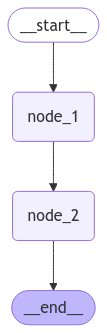

In [16]:
display (Image(graph.get_graph().draw_mermaid_png()))

In [19]:
graph.invoke({"prompt": "hello"})

---node_1 State--- {'prompt': 'hello'}
---node_2 State--- {'prompt': 'hello I am'}


{'prompt': 'hello I am happpy!'}